[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Train on 15000 samples, validate on 10000 samples
Epoch 1/20

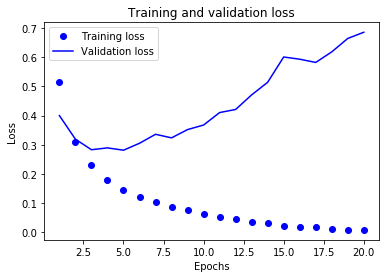

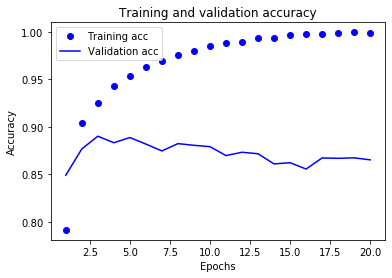

In [11]:
from keras.datasets import imdb
import keras

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

#print(len(x_train))

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

#Defining the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compliling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

"""
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
"""

#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting the training and validation accuracy
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

In [3]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

#Training the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.4779 - accuracy: 0.8040
Epoch 2/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.2621 - accuracy: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.1997 - accuracy: 0.9302
Epoch 4/4
25000/25000 [==============================] - 11s 42

[0.2968468089962006, 0.88264000415802]

In [4]:
pred=model.predict(x_test)
pred

array([[0.13946849],
       [0.999978  ],
       [0.7923908 ],
       ...,
       [0.10878184],
       [0.06309003],
       [0.5608302 ]], dtype=float32)

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [2]:
import numpy as np

r=np.zeros((3, 3))
np.zeros((3, 3))
#r[1,2]=1
print(r)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [18]:
a=[[1,2],[1],[0,2,1]]
for i, a in enumerate(a):
    print([i,a])
    r[i, a] = 1
print(r)

[0, [1, 2]]
[1, [1]]
[2, [0, 2, 1]]
[[0. 1. 1.]
 [0. 1. 0.]
 [1. 1. 1.]]


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.5958 - acc: 0.7881 - val_loss: 0.4809 - val_acc: 0.8632
Epoch 2/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.4057 - acc: 0.8923 - val_loss: 0.4021 - val_acc: 0.8670
Epoch 3/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.3248 - acc: 0.9128 - val_loss: 0.3474 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.2796 - acc: 0.9246 - val_loss: 0.3370 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.2548 - acc: 0.9331 - val_loss: 0.3341 - val_acc: 0.8875
Epoch 6/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.2348 - acc: 0.9434 - val_loss: 0.3360 - val_acc: 0.8879
Epoch 7/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.2254 - acc: 0.9440 - val_loss: 0.3412 - 

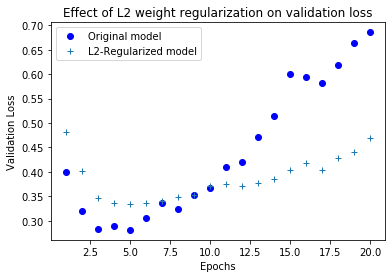

In [12]:
#Adding weight regularization

from keras import regularizers
model_reg = models.Sequential()
model_reg.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model_reg.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model_reg.add(layers.Dense(1, activation='sigmoid'))

#Compliling the model
model_reg.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#Training the model
history_reg= model_reg.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_reg_dict = history_reg.history
history_reg_dict.keys()

#Plotting the effect of L2 weight regularization on validation loss

import matplotlib.pyplot as plt
val_loss = history.history['val_loss']
val_loss_reg = history_reg.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss, 'bo', label='Original model')
plt.plot(epochs, val_loss_reg, '+', label='L2-Regularized model')
plt.title('Effect of L2 weight regularization on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

#Different weight regularizers available in Keras

from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001) #Simultaneous L1 and L2 regularization

In [15]:
#Retraining regularized model from scratch

from keras import regularizers
model_reg = models.Sequential()
model_reg.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model_reg.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model_reg.add(layers.Dense(1, activation='sigmoid'))

#Compliling the model
model_reg.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#Training the model
model_reg.fit(x_train, y_train, epochs=6, batch_size=512)

results = model_reg.evaluate(x_test, y_test)
results

Epoch 1/6
25000/25000 [==============================] - 3s 140us/step - loss: 0.5002 - acc: 0.8216
Epoch 2/6
25000/25000 [==============================] - 3s 128us/step - loss: 0.3176 - acc: 0.9032
Epoch 3/6
25000/25000 [==============================] - 3s 129us/step - loss: 0.2686 - acc: 0.9218
Epoch 4/6
25000/25000 [==============================] - 3s 128us/step - loss: 0.2481 - acc: 0.9288
Epoch 5/6
25000/25000 [==============================] - 3s 131us/step - loss: 0.2372 - acc: 0.9344
Epoch 6/6
25000/25000 [==============================] - 4s 152us/step


[0.35594160640716555, 0.880840003490448]